# PM sensor scripts

**Table of contents**  
[Civic Labs resources](#Civic-Labs-resources)  
[Madavi.de resources](#Madavi.de-resources)  
[Luftdaten.info resources](#Luftdaten.info-resources)  
[Irceline.be resources](#Irceline.be-resources)  
[Combining the sources](#Combining-the-sources)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
%run airqdata
pd.set_option("display.max_rows", 10)

## Civic Labs resources

### Download list of sensors from Civic Labs' Google Sheet

In [3]:
sensors = civiclabs.get_sensors(refresh_cache=True)
sensors.head(4)

,Chip_ID,Sensor_ID,Address
0,4021549,3445,"Avenue Princesse Elisabeth 28, Schaarbeek"
1,4022301,3803,"Rue Brogniez, Anderlecht"
2,4020466,3805,"Rue de l'Équateur, Uccle"
3,4018142,3893,"Avenue de la Renaissance 10, Bruxelles"


In [4]:
len(sensors)

15

In [5]:
demo_chip_id = sensors["Chip_ID"][3]
demo_sensor_id = sensors["Sensor_ID"][3]
demo_chip_id, demo_sensor_id

('4018142', '3893')

In [6]:
sensors[sensors.Sensor_ID == "3893"]

,Chip_ID,Sensor_ID,Address
3,4018142,3893,"Avenue de la Renaissance 10, Bruxelles"


## Madavi.de resources

### Open web pages in browser showing data history graphs of a sensor

In [7]:
# Particulate matter
madavi.open_graphs(demo_chip_id)

# Temperature and humidity
madavi.open_graphs(demo_chip_id, sensor_model="dht")

## Luftdaten.info resources

### Create a Sensor object and get the sensor's current data

In [8]:
demo_sensor = luftdaten.Sensor(demo_sensor_id, refresh_cache=True)
demo_sensor

<luftdaten.info sensor 3893 at 0x7f6e5a3bff28>

In [9]:
demo_sensor.metadata

id                                    386667355
location.country                             BE
location.id                                1962
location.latitude                        50.844
location.longitude                        4.389
                                       ...     
sensor.id                                  3893
sensor.pin                                    1
sensor.sensor_type.id                        14
sensor.sensor_type.manufacturer    Nova Fitness
sensor.sensor_type.name                  SDS011
Name: metadata, Length: 11, dtype: object

In [10]:
demo_sensor.url

'https://api.luftdaten.info/v1/sensor/3893/'

In [11]:
demo_sensor.current_values

{'pm10': 7.1299999999999999, 'pm2.5': 5.3700000000000001}

### Retrieve data history
Data are retrieved from cache or server and then cleaned (see luftdaten.Sensor.clean_data).

In [12]:
demo_sensor.get_data(start_date="2017-10-01", end_date="2017-10-05")

Using cached luftdaten.info data for sensor 3893 on 2017-10-01
Using cached luftdaten.info data for sensor 3893 on 2017-10-02
Using cached luftdaten.info data for sensor 3893 on 2017-10-03
Using cached luftdaten.info data for sensor 3893 on 2017-10-04
Using cached luftdaten.info data for sensor 3893 on 2017-10-05


### Inspect, summarize and plot data

In [13]:
demo_sensor.measurements

,pm10,pm2.5
timestamp,,
2017-10-01 00:00:15+00:00,10.93,8.03
2017-10-01 00:02:43+00:00,15.80,7.27
2017-10-01 00:05:11+00:00,19.53,9.83
2017-10-01 00:07:40+00:00,11.93,7.50
2017-10-01 00:10:08+00:00,12.10,8.47
...,...,...
2017-10-05 23:48:53+00:00,10.90,9.80
2017-10-05 23:51:21+00:00,18.58,9.75
2017-10-05 23:53:48+00:00,16.15,9.88


In [14]:
describe(demo_sensor.measurements)

,pm10,pm2.5
count,2913.00,2913.00
mean,14.16,5.28
std,10.22,2.89
min,2.23,1.57
1%,3.27,1.83
50%,11.20,4.60
99%,56.10,16.79
max,71.03,24.13


In [15]:
describe(demo_sensor.measurements)

,pm10,pm2.5
count,2913.00,2913.00
mean,14.16,5.28
std,10.22,2.89
min,2.23,1.57
1%,3.27,1.83
50%,11.20,4.60
99%,56.10,16.79
max,71.03,24.13


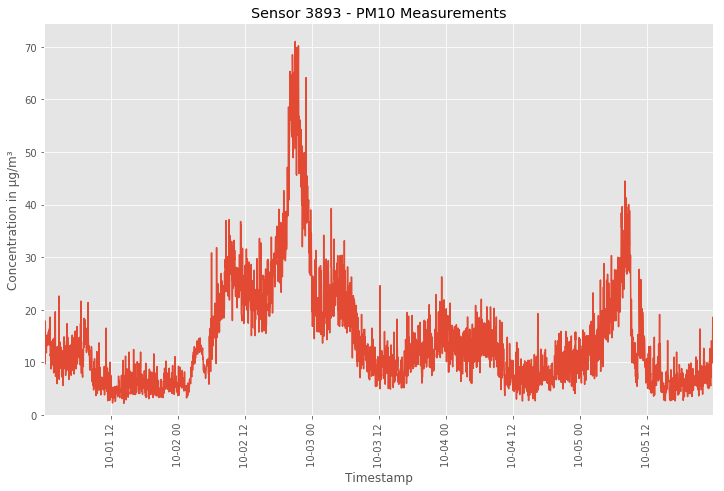

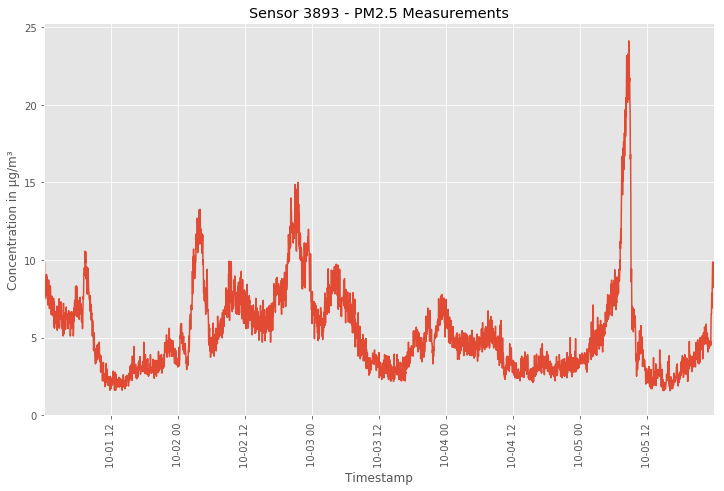

In [16]:
demo_sensor.plot_measurements()

### Inspect, summarize and plot hourly data coverage

In [17]:
demo_sensor.hourly_coverage

,pm10,pm2.5
Period,,
2017-10-01 00:00,1.0,1.0
2017-10-01 01:00,1.0,1.0
2017-10-01 02:00,1.0,1.0
2017-10-01 03:00,1.0,1.0
2017-10-01 04:00,1.0,1.0
...,...,...
2017-10-05 19:00,1.0,1.0
2017-10-05 20:00,1.0,1.0
2017-10-05 21:00,1.0,1.0


In [18]:
describe(demo_sensor.hourly_coverage)

,pm10,pm2.5
count,1.20e+02,1.20e+02
mean,9.99e-01,9.99e-01
std,8.48e-03,8.48e-03
min,9.17e-01,9.17e-01
1%,9.66e-01,9.66e-01
50%,1.00e+00,1.00e+00
99%,1.00e+00,1.00e+00
max,1.00e+00,1.00e+00


Text(0,0.5,'Coverage')

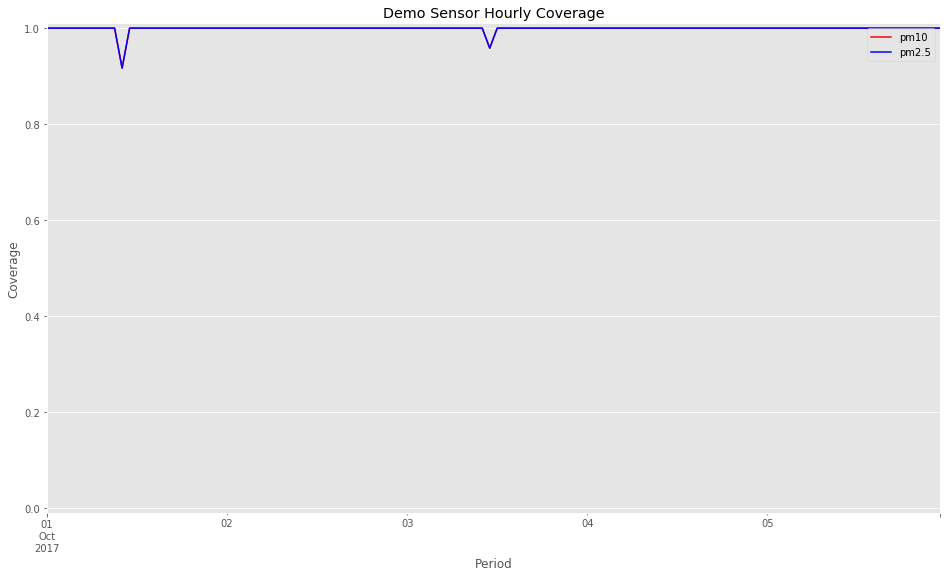

In [19]:
demo_sensor.hourly_coverage.plot(figsize=(16,9), color=("r", "b"), ylim=(-0.01, 1.01),
                                 title="Demo Sensor Hourly Coverage")
plt.ylabel("Coverage")

### Inspect, summarize and plot hourly means

In [20]:
demo_sensor.hourly_means

,pm10,pm2.5
Period,,
2017-10-01 00:00,14.09,8.20
2017-10-01 01:00,12.12,6.96
2017-10-01 02:00,11.29,6.30
2017-10-01 03:00,10.67,6.18
2017-10-01 04:00,11.20,6.17
...,...,...
2017-10-05 19:00,6.20,3.24
2017-10-05 20:00,6.31,3.62
2017-10-05 21:00,7.15,4.33


In [21]:
describe(demo_sensor.hourly_means)

,pm10,pm2.5
count,120.00,120.00
mean,14.14,5.27
std,9.69,2.76
min,4.16,2.06
1%,4.91,2.09
50%,11.71,4.65
99%,54.41,13.21
max,58.74,20.64


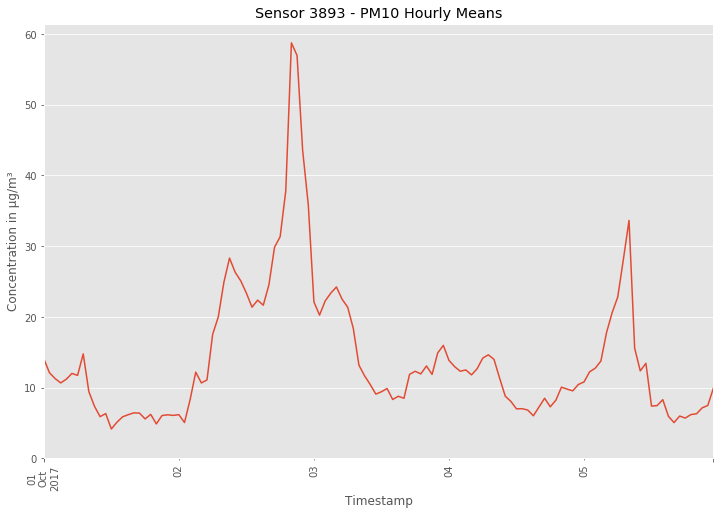

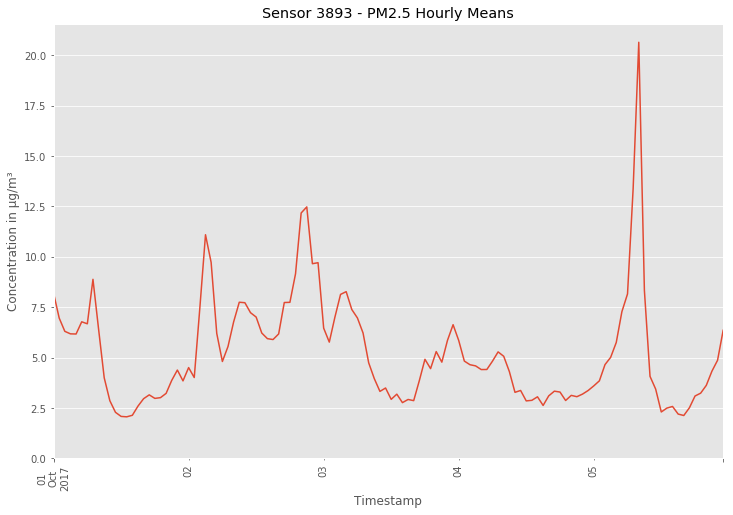

In [22]:
demo_sensor.plot_hourly_means()

### Check distribution of sample intervals
In seconds

In [23]:
demo_sensor.intervals.sort_values(ascending=False).head(10)

148.0    1653
147.0     703
149.0     433
150.0      69
151.0      13
152.0       6
154.0       6
153.0       5
155.0       4
156.0       3
Name: timestamp, dtype: int64

### List sensors near a given location

Defaults to searching within an 8 kilometer radius around the center of Brussels

In [24]:
near = luftdaten.search_proximity()
near

,sensor_type,latitude,longitude,distance
sensor_id,,,,
5561,SDS011,50.85,4.36,0.48
5562,DHT22,50.85,4.36,0.48
2905,DHT22,50.85,4.34,0.84
2904,SDS011,50.85,4.34,0.84
6148,DHT22,50.84,4.37,1.32
...,...,...,...,...
3893,SDS011,50.84,4.39,2.70
3807,SDS011,50.86,4.32,2.80
3445,SDS011,50.87,4.38,3.23


Sensors near Antwerp

In [25]:
luftdaten.search_proximity(lat=51.22, lon=4.41, radius=20)

,sensor_type,latitude,longitude,distance
sensor_id,,,,
5937,SDS011,51.22,4.41,0.24
6051,SDS011,51.20,4.43,2.30
2588,SDS011,51.20,4.44,3.10
2589,DHT22,51.20,4.44,3.10
6085,SDS011,51.23,4.48,4.75


No data for sensor 5973
No data for sensor 6147


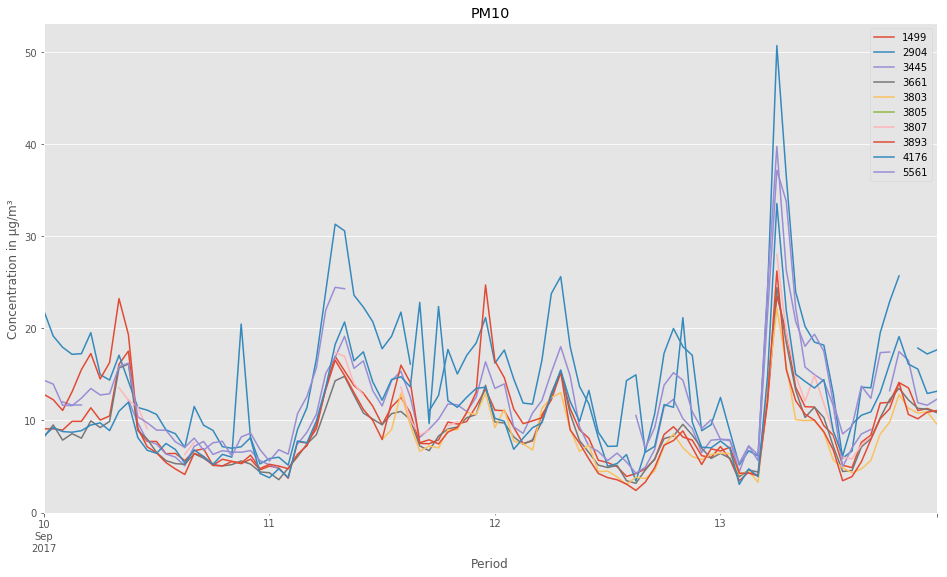

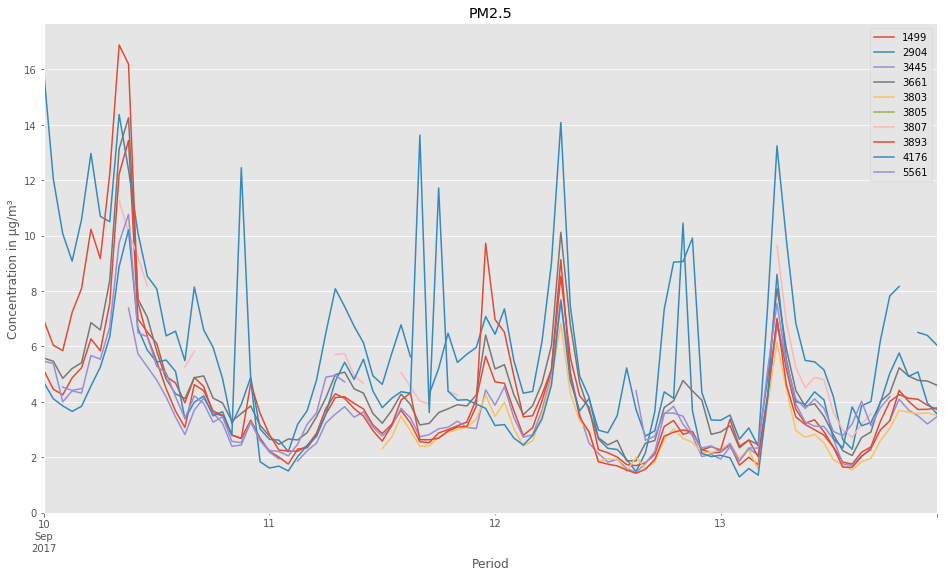

In [26]:
(near_sensors,
 hourly_means) = luftdaten.evaluate_near_sensors(start_date="2017-09-10",
                                                 end_date="2017-09-13",
                                                 quiet=True)

In [27]:
hourly_means

pm10                                                      \
                   1499   2904   3445   3661   3803 3805 3807   3893   4176   
Period                                                                        
2017-09-10 00:00   9.08  21.92  16.38   8.18    NaN  NaN  NaN  12.84   8.30   
2017-09-10 01:00   9.10  19.16    NaN   9.52    NaN  NaN  NaN  12.26   9.23   
2017-09-10 02:00   8.95  17.95  12.03   7.87    NaN  NaN  NaN  11.09   8.80   
2017-09-10 03:00   9.91  17.18  11.67   8.57    NaN  NaN  NaN  13.10   8.72   
2017-09-10 04:00   9.91  17.25  11.69   8.08    NaN  NaN  NaN  15.52   8.89   
...                 ...    ...    ...    ...    ...  ...  ...    ...    ...   
2017-09-13 19:00  14.11  25.69  17.48  13.50  12.81  NaN  NaN  14.12  19.11   
2017-09-13 20:00  13.54    NaN  16.52  12.23  11.33  NaN  NaN  10.65  16.12   
2017-09-13 21:00  11.08  17.86  11.93  11.32  10.80  NaN  NaN  10.19  15.58   
2017-09-13 22:00  11.30  17.22  11.66  11.21  10.95  NaN  NaN  10.90  12.93   
2017-09-13 23:00  10.92  17.65  12.29  10.87   9.63  NaN  NaN  11.07  13.17   

                        pm2.5                                                 \
                   5561  1499   2904  3445  3661  3803 3805 3807  3893  4176   
Period                                                                         
2017-09-10 00:00  14.37  5.13  15.83  6.31  5.58   NaN  NaN  NaN  6.93  4.69   
2017-09-10 01:00  13.95  4.45  12.04   NaN  5.46   NaN  NaN  NaN  6.04  4.11   
2017-09-10 02:00  11.66  4.25  10.07  4.53  4.85   NaN  NaN  NaN  5.85  3.85   
2017-09-10 03:00  11.61  4.86   9.08  4.41  5.20   NaN  NaN  NaN  7.23  3.65   
2017-09-10 04:00  12.42  5.23  10.58  4.48  5.41   NaN  NaN  NaN  8.09  3.84   
...                 ...   ...    ...   ...   ...   ...  ...  ...   ...   ...   
2017-09-13 19:00    NaN  4.26   8.16  4.09  5.23  3.69  NaN  NaN  4.42  5.76   
2017-09-13 20:00    NaN  4.13    NaN  3.70  4.93  3.63  NaN  NaN  4.02  4.92   
2017-09-13 21:00    NaN  4.09   6.50  3.49  4.77  3.57  NaN  NaN  3.72  5.08   
2017-09-13 22:00    NaN  3.88   6.40  3.20  4.75  3.60  NaN  NaN  3.73  3.96   
2017-09-13 23:00    NaN  3.73   6.05  3.45  4.60  3.51  NaN  NaN  3.78  3.57   

                        
                  5561  
Period                  
2017-09-10 00:00  5.46  
2017-09-10 01:00  5.38  
2017-09-10 02:00  4.00  
2017-09-10 03:00  4.40  
2017-09-10 04:00  4.31  
...                ...  
2017-09-13 19:00   NaN  
2017-09-13 20:00   NaN  
2017-09-13 21:00   NaN  
2017-09-13 22:00   NaN  
2017-09-13 23:00   NaN  

[96 rows x 20 columns]

## Irceline.be resources

### Get IRCELINE metadata about phenomena and stations

In [28]:
irceline_metadata = irceline.Metadata()

Using cached phenomenon metadata
Using cached station metadata
Using cached time series metadata


In [29]:
irceline_metadata.phenomena

,label
id,
1,Sulphur dioxide
10,Carbon Monoxide
20,Benzene
21,Toluene
38,Nitrogen monoxide
...,...
62101,temperature
7,Ozone
71,Carbon Dioxide


In [30]:
irceline_metadata.stations

,label,lon,lat
id,,,
1030,40AL01 - LINKEROEVER,4.39,51.24
1031,40AL02 - BEVEREN,4.23,51.30
1032,40AL03 - BEVEREN,4.20,51.25
1033,40AL04 - BEVEREN,4.29,51.29
1034,40AL05 - BEVEREN,4.28,51.26
...,...,...,...
1240,47E715 - ZUIENKERKE,3.17,51.25
1241,47E716 - MARIAKERKE,3.68,51.07
1242,47E804 - Kallo,4.31,51.28


In [31]:
irceline_metadata.get_stations_by_name("bru")

,label,lon,lat
id,,,
1110,41B004 - Bruxelles (Sainte-Catherine),4.35,50.85
1112,41B006 - Bruxelles (Parlement UE),4.37,50.84
1711,41B008 - Brussel (Beliardstraat),4.38,50.84


In [32]:
irceline_metadata.time_series

,label,phenomenon,unit,station_id,station_label,station_lon,station_lat
id,,,,,,,
6522,"1,2-XYLENE O-XYLENE 6522 - btx, o-xyleen - pro...","1,2-XYLENE O-XYLENE",ug/m3,1112,41B006 - Bruxelles (Parlement UE),4.37,50.84
6202,"Benzene 6202 - ? - procedure, 40GK09 - GENK",Benzene,ug/m3,1045,40GK09 - GENK,5.49,50.93
6274,"Benzene 6274 - Synspec - procedure, 40LD01 - L...",Benzene,ug/m3,1058,40LD01 - LAAKDAL,5.00,51.11
6283,"Benzene 6283 - Synspec - procedure, 40LD02 - L...",Benzene,ug/m3,1059,40LD02 - LAAKDAL,5.02,51.12
6487,Benzene 6487 - Airmotec 10000S plus benzeen - ...,Benzene,ug/m3,1107,40ZL01 - ZELZATE,3.81,51.20
...,...,...,...,...,...,...,...
99904,wind speed (scalar) 99904 - Unknown device - p...,wind speed (scalar),m/s,1198,44M705 - ROESELARE,3.15,50.95
99907,wind speed (scalar) 99907 - Unknown device - p...,wind speed (scalar),m/s,1207,44R701 - GENT,3.73,51.06
99910,wind speed (scalar) 99910 - Unknown device - p...,wind speed (scalar),m/s,1127,42M802 - ANTWERPEN,4.42,51.26


### How many stations measure a given phenomenon?

In [33]:
irceline_metadata.time_series["phenomenon"].value_counts()

Nitrogen dioxide               90
Nitrogen monoxide              90
Particulate Matter < 10 µm     65
Particulate Matter < 2.5 µm    63
Sulphur dioxide                53
                               ..
1,2-XYLENE O-XYLENE             1
M+P-xylene                      1
Toluene                         1
Particulate Matter < 1 µm       1
Number of particles < 1 µm      1
Name: phenomenon, Length: 20, dtype: int64

### How many phenomena does a given station measure?

In [34]:
irceline_metadata.time_series["station_label"].value_counts().head()

44R701 - GENT                    12
41R001 - Molenbeek-Saint-Jean    11
44N029 - HOUTEM                  11
41R012 - UCCLE                   11
42R801 - BORGERHOUT               9
Name: station_label, dtype: int64

### List stations that measure PM2.5 or PM10

In [35]:
pd.set_option("display.max_rows", 4)

In [36]:
irceline_metadata.pm10_stations

,label,lon,lat
id,,,
1159,42R831 - BERENDRECHT,4.34,51.35
1710,42R834 - Boom,4.38,51.09
...,...,...,...
1220,45R511 - MARCINELLE,4.42,50.38
1221,45R512 - MARCHIENNE,4.40,50.41


In [37]:
irceline_metadata.pm25_stations

,label,lon,lat
id,,,
1044,40GK06 - GENK,5.47,50.93
1070,40RL01 - ROESELARE,3.12,50.95
...,...,...,...
1208,44R710 - DESTELBERGE,3.78,51.06
1048,40HB23 - HOBOKEN,4.34,51.17


### List stations that measure a given phenomenon

In [38]:
irceline_metadata.list_stations_by_phenomenon("ethylbenzene")

,label,lon,lat
id,,,
1112,41B006 - Bruxelles (Parlement UE),4.37,50.84


### What does the Uccle station measure?

In [39]:
irceline_metadata.list_station_time_series("ucc")

,label,phenomenon,unit,station_id,station_label
id,,,,,
10607,"Black Carbon 10607 - - procedure, 41R012 - UCCLE",Black Carbon,ug/m3,1122,41R012 - UCCLE
6619,Carbon Dioxide 6619 - This model 41H - procedu...,Carbon Dioxide,ppm,1122,41R012 - UCCLE
...,...,...,...,...,...
99939,wind direction 99939 - Unknown device - proced...,wind direction,degrees,1122,41R012 - UCCLE
99940,wind speed (scalar) 99940 - Unknown device - p...,wind speed (scalar),m/s,1122,41R012 - UCCLE


### List stations near a location
Defaults to coordinates and radius of Brussels

In [40]:
irceline_metadata.search_proximity(lat=50.9, lon=4.4, radius=5)

,label,lon,lat,distance
id,,,,
1116,41MEU1 - MEUDON,4.39,50.90,0.75
1117,41N043 - HAREN,4.38,50.88,2.18
1232,47E008 - Grimbergen,4.40,50.93,2.92
1143,42R010 - Sint-Stevens-Woluwe,4.43,50.87,4.36


## Combining the sources

In [41]:
pd.set_option("display.max_rows", 10)

### Which PM-measuring IRCELINE stations are closest to a given sensor?

In [42]:
nearest = find_nearest_pm_stations(sensor_id=demo_sensor_id, quiet=True)
nearest

,pm10,pm2.5
label,Particulate Matter < 10 µm 6643 - PM10 FDMS - ...,Particulate Matter < 2.5 µm 6579 - TEOM FDMS -...
phenomenon,Particulate Matter < 10 µm,Particulate Matter < 2.5 µm
unit,ug/m3,ug/m3
station_id,1124,1118
station_label,41WOL1 - WOL.ST.L.,41R001 - Molenbeek-Saint-Jean
station_lon,4.4,4.3
station_lat,51,51
distance,2.9,3.9
time series id,6643,6579


### Compare sensor data to nearest IRCELINE station(s)

pm2.5           pm10       
                 station sensor station sensor
2017-07-01 00:00   14.50  24.15    13.5  32.41
2017-07-01 01:00   11.55  31.35    16.5  49.19
2017-07-01 02:00   15.55    NaN    20.0    NaN
2017-07-01 03:00   19.40    NaN    21.5    NaN
2017-07-01 04:00   18.95    NaN    21.0    NaN
...                  ...    ...     ...    ...
2017-07-06 19:00     NaN   7.19     NaN   8.09
2017-07-06 20:00     NaN   5.72     NaN   6.97
2017-07-06 21:00     NaN   2.77     NaN   3.56
2017-07-06 22:00     NaN   2.12     NaN   2.52
2017-07-06 23:00     NaN   3.05     NaN   3.73

[144 rows x 4 columns]

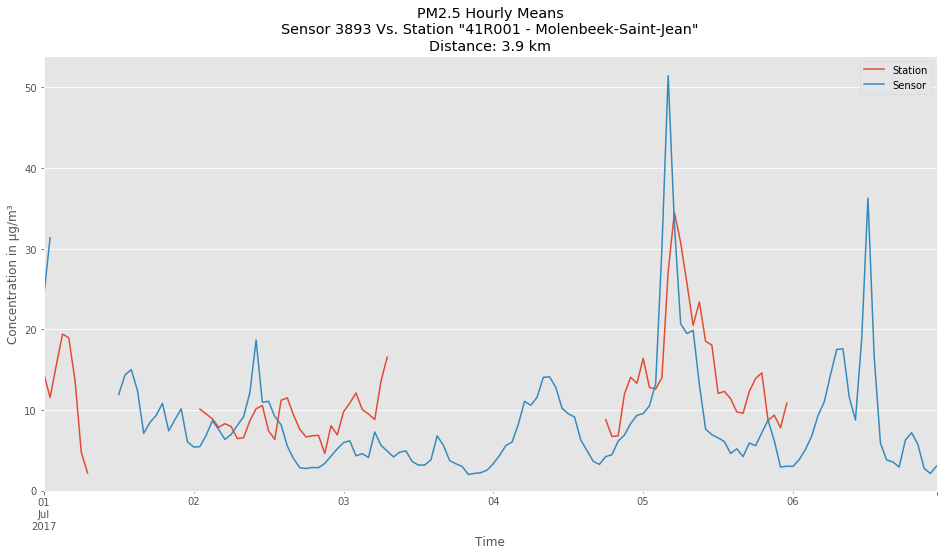

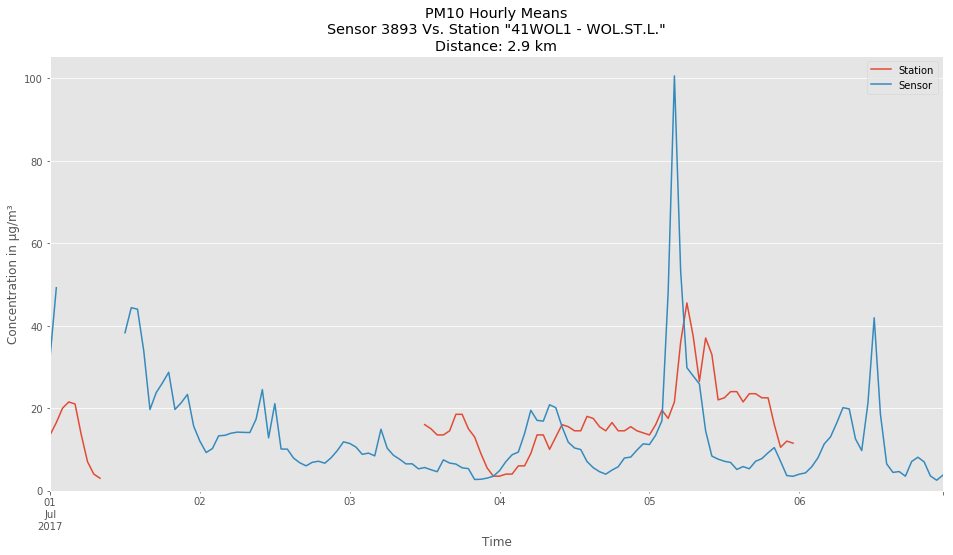

In [43]:
data, plots = compare_sensor_and_station(sensor_id=demo_sensor_id,
                                         start_date="2017-07-01",
                                         end_date="2017-07-06",
                                         quiet=True)
data

## Export a data for use in another environment

In [44]:
# demo_sensor.data.to_csv("sensor_data.csv")